# The zoologist

The zoologist is an expert at recognizing penguin species. Here are 3 species of penguin that our specialist is able to name:

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/01-Fundamentals-of-Machine-Learning/palmer-penguins.png" width=1000>

Are you able to differentiate them?

## The task

As we know nothing about penguins, let's use a Machine Learning algorithm to help us classify these penguins based on their characteristics.

## Load the dataset

Let's load the seaborn's [Penguins dataset](https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv) and store it in a DataFrame getting rid of the `nans` to make things easy! You should get:

<img src='https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/01-Fundamentals-of-Machine-Learning/penguin-df.png' width=600>

In [56]:
import seaborn as sns
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, KFold
from sklearn.multiclass import OneVsOneClassifier

In [5]:
df = sns.load_dataset('penguins')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [13]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [15]:
df.shape

(344, 7)

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(333, 7)

In [19]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

❓What are the characteristics of the penguins

<img src='https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/gentoo.png' width=700>

❓How many species of penguin are there in this dataset?

In [24]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

❓How many observations for each species are there in the dataset?

In [25]:
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [27]:
df['species'].value_counts(normalize=True)*100

Adelie       43.843844
Gentoo       35.735736
Chinstrap    20.420420
Name: species, dtype: float64

## Data visualization

Plot the `'bill_length_mm'` against the `'bill_depth_mm'` with a different color for each species:

Text(0, 0.5, 'Depth')

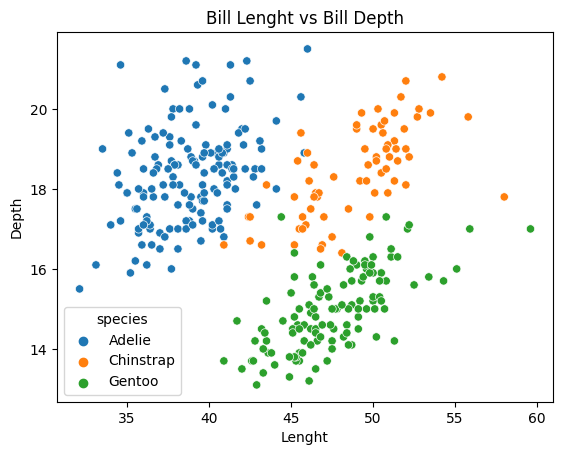

In [40]:
ax_1 = sns.scatterplot(data=df, x='bill_length_mm', y= 'bill_depth_mm', hue= 'species')
ax_1.set_title('Bill Lenght vs Bill Depth')
ax_1.set_xlabel('Lenght')
ax_1.set_ylabel('Depth')



❓Are you able to differentiate these species based on your observations?

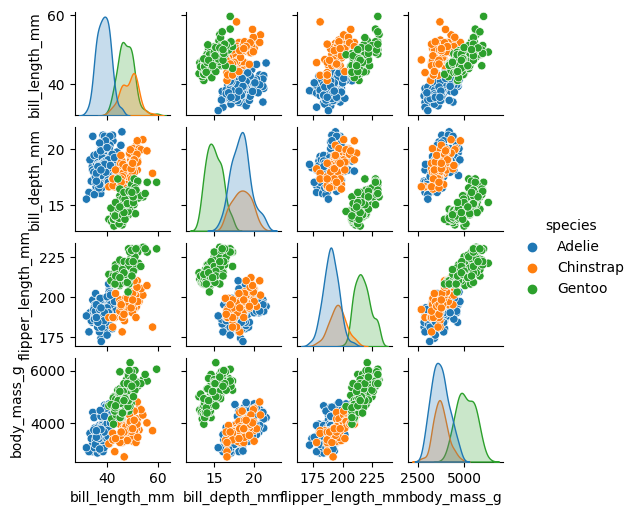

In [42]:
sns.pairplot(df, height=1.3, hue='species')


The **gentoo** species seems to have clearly longer flippers than the other 2 species.

## Modeling

There are two strategies to tackle the multiclass problem:

- One vs One
- One vs All (One vs Rest)

### One vs One
- Train **a model for each pair of classes** within the dataset
- At prediction time, the class which received the most votes is selected

<img src='images/ovo_multiclass.png' width=500 style='margin:auto'> 


👍Considers pair-specific differences


👎Creates a large number of sub models. Computationally expensive


### One vs Rest (One vs All)

- Train **one model per class** against all others combined
- At prediction time, the class with the highest probability is selected

<img src='images/ova_multiclass.png' width=500 style='margin:auto'> 

👍Less computationally expensive


👎Loses pair-specific differences that get diluted in a combination of classes


## One Vs Rest

👇 Evaluate a model that predicts the penguin species according to it **numerical** features. Implement a One vs Rest multiclass strategy by tweaking the right parameter of `LogisticRegression`. Evaluate it by cross-validation and record the time it takes to do so.

In [47]:
#using cross validation

X= df[['bill_length_mm','bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y=df['species']

model_1 = LogisticRegression(multi_class='ovr')

In [54]:
cv_results_1 = cross_validate(model_1, X, y,cv=5)
cv_results_1
score= cv_results_1['test_score'].mean()
time = cv_results_1['score_time'].sum() + cv_results_1['test_score'].sum()



/Users/leonardomichelramirez/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/leonardomichelramirez/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solve

In [55]:
print(score, time)

0.9880144730891001 4.943450279874211


## One Vs One

👇 This time, implement a `OneVsOneClassifier`. There is no parameter to directly specify a OvO multiclass strategy in `LogisticRegression`. You'll need to find an alternative way to do so 😉

Again, Evaluate by cross-validation and record the time it takes to do so.

In [57]:
model_2 = OneVsOneClassifier(LogisticRegression())

In [59]:
cv_results_2 = cross_validate(model_2, X,y,cv=5)
cv_results_2

score_2 = cv_results_2['test_score'].mean()
time_2 = cv_results_2['score_time'].sum()+cv_results_2['fit_time'].sum()

/Users/leonardomichelramirez/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/leonardomichelramirez/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solve

In [60]:
print(score_2, time_2)

0.9850293984622344 0.09113407135009766


ℹ️ We notice that both models have very similar accuracies. Why? <br> <br>First, both models are doing a very good job on a dataset that is reasonably easy to classify! Secondly, in the instance of having just three classes to distinguish between, both OvO models and OvR models actually result in 3 sub-models being fitted! Thus we would expect to give very similar accuracy. 

❓The zoologist is able to find the right species 9 times over 10, can you beat him?

<details>
<summary> 👉Solution </summary>
You should get a mean accuracy of around 98% which is more than 90%. So our algorithm beats the zoologist!

</details>

# 🏁 